In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/DATA/kaggle_survey_2022_responses.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [5]:
df.iloc[0]

Duration (in seconds)                                Duration (in seconds)
Q2                                             What is your age (# years)?
Q3                                  What is your gender? - Selected Choice
Q4                               In which country do you currently reside?
Q5                       Are you currently a student? (high school, uni...
                                               ...                        
Q44_8                    Who/what are your favorite media sources that ...
Q44_9                    Who/what are your favorite media sources that ...
Q44_10                   Who/what are your favorite media sources that ...
Q44_11                   Who/what are your favorite media sources that ...
Q44_12                   Who/what are your favorite media sources that ...
Name: 0, Length: 296, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Columns: 296 entries, Duration (in seconds) to Q44_12
dtypes: object(296)
memory usage: 54.2+ MB


In [7]:
df.dtypes

Duration (in seconds)    object
Q2                       object
Q3                       object
Q4                       object
Q5                       object
                          ...  
Q44_8                    object
Q44_9                    object
Q44_10                   object
Q44_11                   object
Q44_12                   object
Length: 296, dtype: object

Q2. What is your age?

In [8]:
df['Q2'].unique()

array(['What is your age (# years)?', '30-34', '18-21', '55-59', '45-49',
       '70+', '22-24', '35-39', '40-44', '50-54', '25-29', '60-69'],
      dtype=object)

In [9]:
age = df['Q2'].value_counts().sort_values(ascending = False)
age

18-21                          4559
25-29                          4472
22-24                          4283
30-34                          2972
35-39                          2353
40-44                          1927
45-49                          1253
50-54                           914
55-59                           611
60-69                           526
70+                             127
What is your age (# years)?       1
Name: Q2, dtype: int64

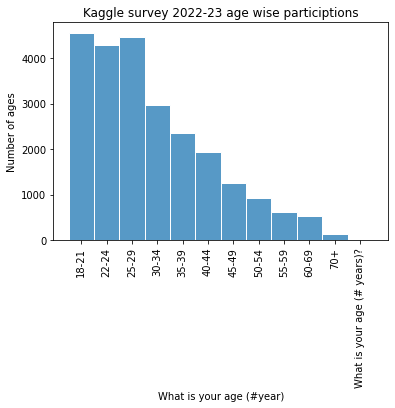

In [10]:
fig, ax = plt.subplots()
sns.set_style('dark')
sns.histplot(df['Q2'].sort_values(ascending = True), ax = ax)
plt.xticks(rotation = 90)
ax.set(xlabel= "What is your age (#year)",
      ylabel ="Number of ages",
      title = "Kaggle survey 2022-23 age wise participtions");

# What is your gender? 

In [11]:
gender = df['Q3'].value_counts()[:5]
gender

Man                        18266
Woman                       5286
Prefer not to say            334
Nonbinary                     78
Prefer to self-describe       33
Name: Q3, dtype: int64

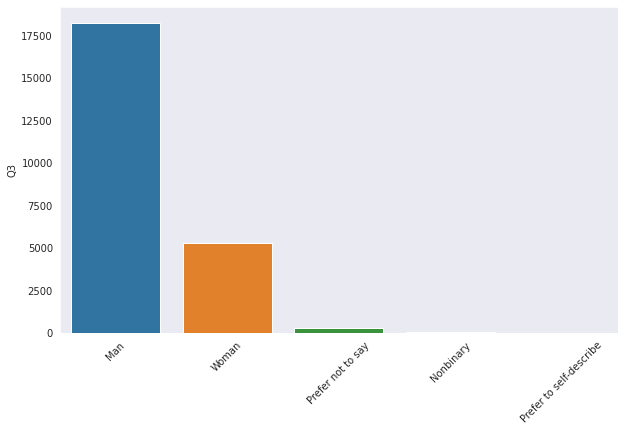

In [12]:
gender_counts = df["Q3"].value_counts()[: 5]
plt.figure(figsize=(10,6))
sns.barplot(x = gender_counts.index, y = gender_counts, orient='v');
plt.xticks(rotation=45);
ax.set_ylabel("Count")
ax.set_xlabel("Gender")
ax.set_title("Gender participatent in Kaggle 2022")
plt.show()

# In which country do you currently reside?

In [13]:
resident = df['Q4'].value_counts()[:-1]
resident

India                                                   8792
United States of America                                2920
Other                                                   1430
Brazil                                                   833
Nigeria                                                  731
Pakistan                                                 620
Japan                                                    556
China                                                    453
Egypt                                                    383
Mexico                                                   380
Indonesia                                                376
Turkey                                                   345
Russia                                                   324
South Korea                                              317
France                                                   262
United Kingdom of Great Britain and Northern Ireland     258
Canada                  

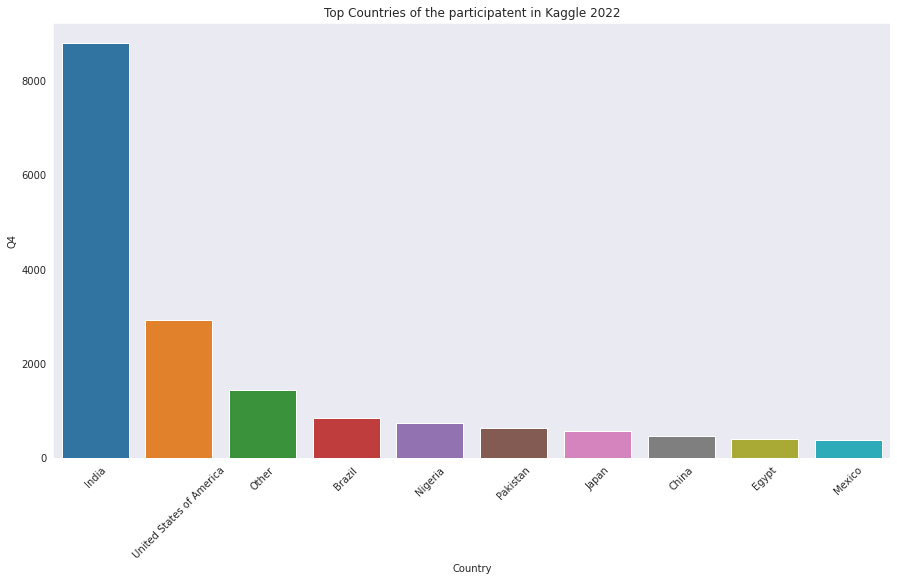

In [14]:
#Top Ten countries
top_countries = df['Q4'].value_counts()[:10]
fig, ax = plt.subplots(figsize=(15,8))
ax.set(xlabel='Country',
       ylabel='Count',
       title = 'Top Countries of the participatent in Kaggle 2022')
plt.xticks(rotation=45)
sns.barplot( x = top_countries.index, y = top_countries, orient='v');
plt.show()

# On which platforms have you begun or completed data science courses? (Select all that apply). 
- edX 
- Kaggle Learn Courses
- DataCamp
- Fast.ai
- Udacity 
- Udemy
- LinkedIn Learning
- Cloud-certification programs (direct from AWS, Azure, GCP, or similar)
- University Courses (resulting in a university degree)
- None
-  Other
This question covered overal all 6 columns

In [15]:
platforms_learning = df[['Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9','Q6_10','Q6_11', 'Q6_12']]

In [16]:
platforms_learning.dropna(axis='columns', how='all', inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [17]:
edx_participants = df['Q6_2'].value_counts()[:1]
edx_participants

edX    2474
Name: Q6_2, dtype: int64

In [18]:
Kaggle_Learn_Courses = df['Q6_3'].value_counts()[:1]
Kaggle_Learn_Courses

Kaggle Learn Courses    6628
Name: Q6_3, dtype: int64

In [19]:
DataCamp_participants = df["Q6_4"].value_counts()[:1]
DataCamp_participants

DataCamp    3718
Name: Q6_4, dtype: int64

In [20]:
Fast_ai = df["Q6_5"].value_counts()[:1]
Fast_ai

Fast.ai    944
Name: Q6_5, dtype: int64

In [21]:
Udacity_participants = df["Q6_6"].value_counts()[:1]
Udacity_participants

Udacity    2199
Name: Q6_6, dtype: int64

In [22]:
Udemy_participants = df["Q6_7"].value_counts()[:1]
Udemy_participants

Udemy    6116
Name: Q6_7, dtype: int64

In [23]:
LinkedIn_Learning = df["Q6_8"].value_counts()[:1]
LinkedIn_Learning

LinkedIn Learning    2766
Name: Q6_8, dtype: int64

In [31]:
top_platforms = pd.DataFrame([edx_participants, Kaggle_Learn_Courses, DataCamp_participants, Fast_ai, Udacity_participants, Udemy_participants, LinkedIn_Learning]).sum().sort_values(ascending = False)
top_platforms

Kaggle Learn Courses    6628.0
Udemy                   6116.0
DataCamp                3718.0
LinkedIn Learning       2766.0
edX                     2474.0
Udacity                 2199.0
Fast.ai                  944.0
dtype: float64

According to this survey, Kaggle Learn Courses have the most learners.

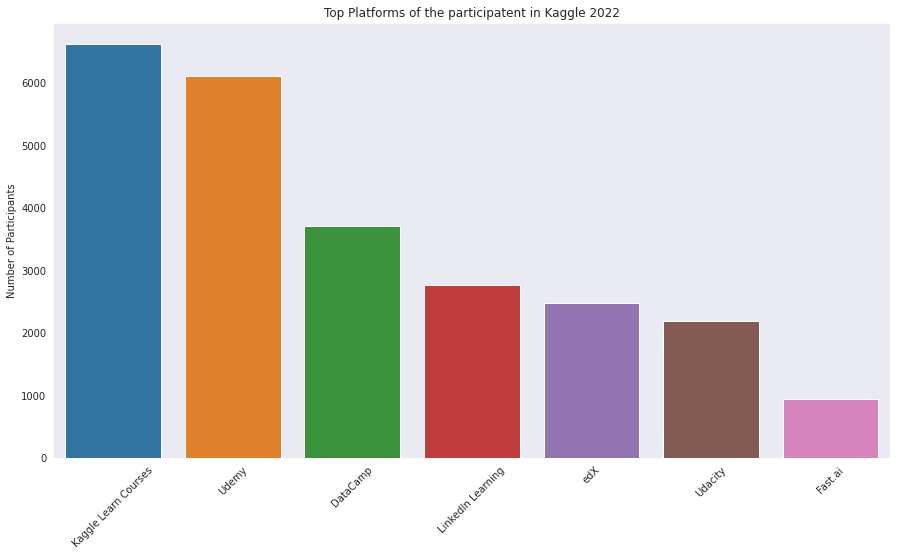

In [32]:
fig, ax = plt.subplots(figsize=(15,8))
# ax.set_ylim([0,20])
ax.set_ylabel("Number of Participants")
ax.set_title("Top Platforms of the participatent in Kaggle 2022")
plt.xticks(rotation=45)
sns.barplot( x = top_platforms.index, y = top_platforms, orient='v');
plt.show()

# What products or platforms did you find to be most helpful when you first started studying data science?

In [34]:
top_products = df[['Q7_1','Q7_2','Q7_3','Q7_4','Q7_5','Q7_6','Q7_7']].
top_products

,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7
0,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,University courses,NaN,NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN
3,NaN,"Online courses (Coursera, EdX, etc)",NaN,"Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",NaN,NaN
4,NaN,"Online courses (Coursera, EdX, etc)",NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN
...,...,...,...,...,...,...,...
23993,University courses,NaN,NaN,"Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",NaN,Other
23994,University courses,NaN,NaN,"Video platforms (YouTube, Twitch, etc)",NaN,NaN,NaN
23995,NaN,"Online courses (Coursera, EdX, etc)","Social media platforms (Reddit, Twitter, etc)","Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",NaN,NaN
23996,NaN,NaN,NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN


In [36]:
university_courses = df['Q7_1'].value_counts()[:1]

online_courses = df['Q7_2'].value_counts()[:1]

social_media = df['Q7_3'].value_counts()[:1]

video_platforms = df['Q7_4'].value_counts()[:1]

kaggle_notebook = df['Q7_5'].value_counts()[:1]


In [39]:
products_users = pd.DataFrame([university_courses, online_courses, social_media, video_platforms, kaggle_notebook]).sum().sort_values(ascending = False)

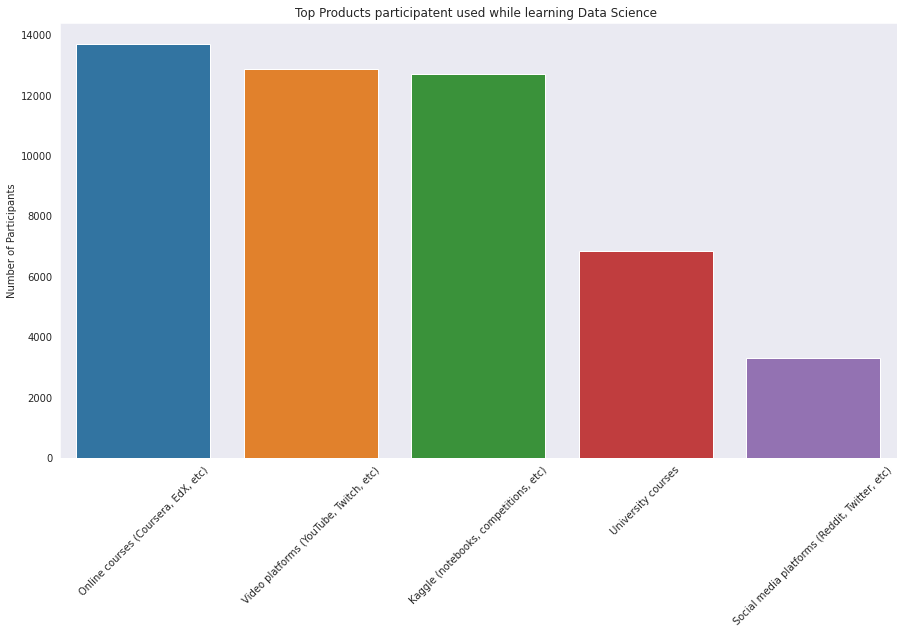

In [40]:
fig, ax = plt.subplots(figsize=(15,8))
# ax.set_ylim([0,20])
ax.set_ylabel("Number of Participants")
ax.set_title("Top Products participatent used while learning Data Science ")
plt.xticks(rotation=45)
sns.barplot( x = products_users.index, y = products_users, orient='v');
plt.show()

# What programming languages do you use on a regular basis? 

In [80]:
python_user = df['Q12_1'].value_counts()[:1]
r_user = df['Q12_2'].value_counts()[:1]
sql_user = df['Q12_3'].value_counts()[:1]
c_user = df['Q12_4'].value_counts()[:1]
c_hash_user = df['Q12_5'].value_counts()[:1]
c_plus_plus_user = df['Q12_6'].value_counts()[:1]
java_user = df['Q12_7'].value_counts()[:1]
javascript_user = df['Q12_8'].value_counts()[:1]
bash_user = df['Q12_9'].value_counts()[:1]
php_user = df['Q12_10'].value_counts()[:1]
matlab_user = df['Q12_11'].value_counts()[:1]
julia_user = df['Q12_12'].value_counts()[:1]
go_user = df['Q12_13'].value_counts()[:1]

In [83]:
top_programming_lang = pd.DataFrame([python_user, r_user, sql_user, c_user, c_hash_user, c_plus_plus_user, java_user, javascript_user, bash_user, php_user, julia_user, go_user]).sum().sort_values(ascending = False)


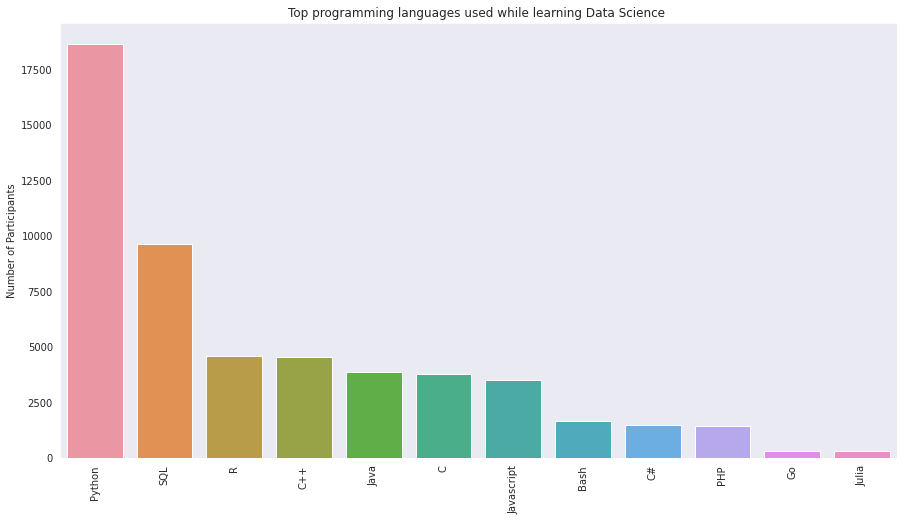

In [84]:
#Top programming languages
fig, ax = plt.subplots(figsize=(15,8))
# ax.set_ylim([0,20])
ax.set_ylabel("Number of Participants")
ax.set_title("Top programming languages used while learning Data Science ")
plt.xticks(rotation=90)
sns.barplot( x = top_programming_lang.index, y = top_programming_lang, orient='v');
plt.show()

Python and SQL are leading the data science world!

# Which of the following integrated development environments (IDE's) do you use on a regular basis?
- JupyterLab
- RStudio 
-  Visual Studio 
-  Visual Studio Code (VSCode
- PyCharm 
- Sublime Text
- Jupyter Notebook

In [86]:
jupyterlab = df['Q13_1'].value_counts()[:1]
rstudio = df['Q13_2'].value_counts()[:1]
visual_studio = df['Q13_3'].value_counts()[:1]
visual_studio_code = df['Q13_4'].value_counts()[:1]
pycharm = df['Q13_5'].value_counts()[:1]
sublime_text = df['Q13_8'].value_counts()[:1]
jupyter_notebook = df['Q13_11'].value_counts()[:1]

In [87]:
ides = pd.DataFrame([jupyterlab,rstudio, visual_studio, visual_studio_code,pycharm, sublime_text, jupyter_notebook]).sum().sort_values(ascending = False)

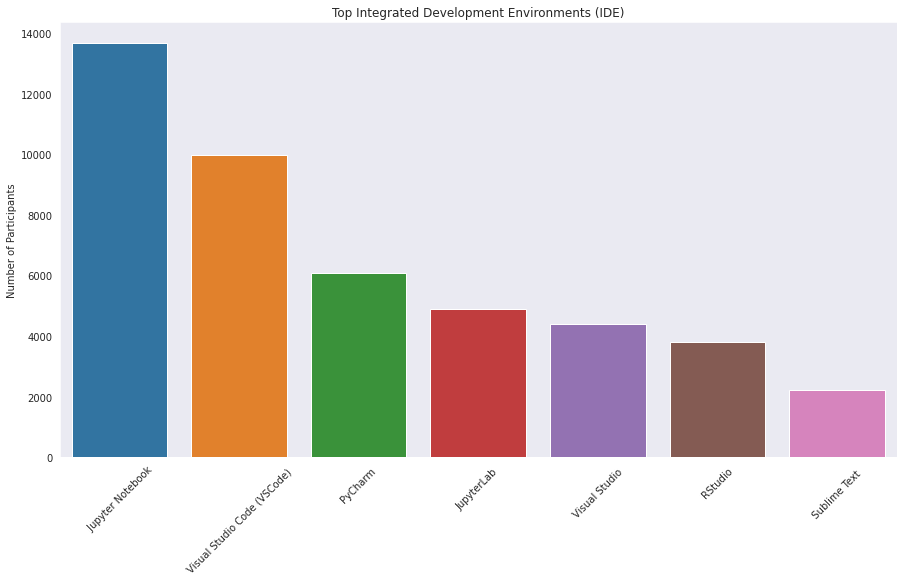

In [88]:
#Top Integrated Development Environments 
fig, ax = plt.subplots(figsize=(15,8))
sns.set_style("ticks")
# ax.set_ylim([0,20])
ax.set_ylabel("Number of Participants")
ax.set_title("Top Integrated Development Environments (IDE)")
plt.xticks(rotation=45)
sns.barplot( x = ides.index, y = ides, orient='v');
plt.show()

Jupyternotebook and VSCode is the most use IDE

# Which of the following machine learning frameworks do you use on a regular basis?
- Scikit-learn
- TensorFlow
- Keras
- PyTorch
- fast.ai
- Xgboost
- Caret
- Jax

In [92]:
sckit_learn = df['Q17_1'].value_counts()[:1]
tensor_flow = df['Q17_2'].value_counts()[:1]
keras = df['Q17_3'].value_counts()[:1]
pytorch = df['Q17_4'].value_counts()[:1]
fast_ai = df['Q17_5'].value_counts()[:1]
xgboost = df['Q17_6'].value_counts()[:1]
caret = df['Q17_9'].value_counts()[:1]
jax = df['Q17_11'].value_counts()[:1]

In [94]:
machine_learning_libraries = pd.DataFrame([sckit_learn, tensor_flow, keras,fast_ai, xgboost, pytorch, caret, jax]).sum()
machine_learning_libraries

  Scikit-learn     11403.0
  TensorFlow        7953.0
 Keras              6575.0
 Fast.ai             648.0
 Xgboost            4477.0
 PyTorch            5191.0
 Caret               821.0
 JAX                 252.0
dtype: float64

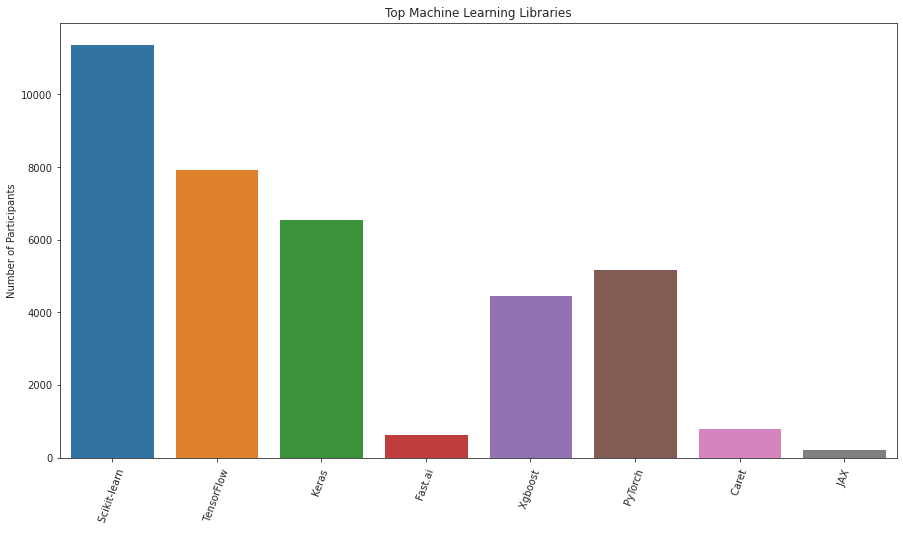

In [95]:
#Top Mchine Learning Libraries
fig, ax = plt.subplots(figsize=(15,8))
# ax.set_ylim([0,20])
ax.set_ylabel("Number of Participants")
ax.set_title("Top Machine Learning Libraries")
plt.xticks(rotation=70)
sns.barplot( y = machine_learning_libraries, x = machine_learning_libraries.index, orient='v')
plt.show();

### Scikit-learn is the most used library of Machine Learning

# Which of the following ML algorithms do you use on a regular basis?
- Linear or Logistic Regression
- Decision Trees or Random Forests
- Gradient Boosting Machines (xgboost, lightgbm, etc)
- Bayesian Approaches
- Evolutionary Approaches
- Dense Neural Networks (MLPs, etc)
- Convolutional Neural Networks
- Generative Adversarial Networks

In [98]:
lg = df['Q18_1'].value_counts()[:1]
rm = df['Q18_2'].value_counts()[:1]
gb = df['Q18_3'].value_counts()[:1]
ba = df['Q18_4'].value_counts()[:1]
ea = df['Q18_5'].value_counts()[:1]
dnn = df['Q18_6'].value_counts()[:1]
cnn = df['Q18_7'].value_counts()[:1]
gan = df['Q18_8'].value_counts()[:1]


In [99]:
ml_algorithms = pd.DataFrame([lg,rm,gb,gan,cnn,gan,ba,dnn]).sum().sort_values(ascending = False)
ml_algorithms

Linear or Logistic Regression                          11338.0
Decision Trees or Random Forests                        9373.0
Convolutional Neural Networks                           6006.0
Gradient Boosting Machines (xgboost, lightgbm, etc)     5506.0
Bayesian Approaches                                     3661.0
Dense Neural Networks (MLPs, etc)                       3476.0
Generative Adversarial Networks                         2332.0
dtype: float64

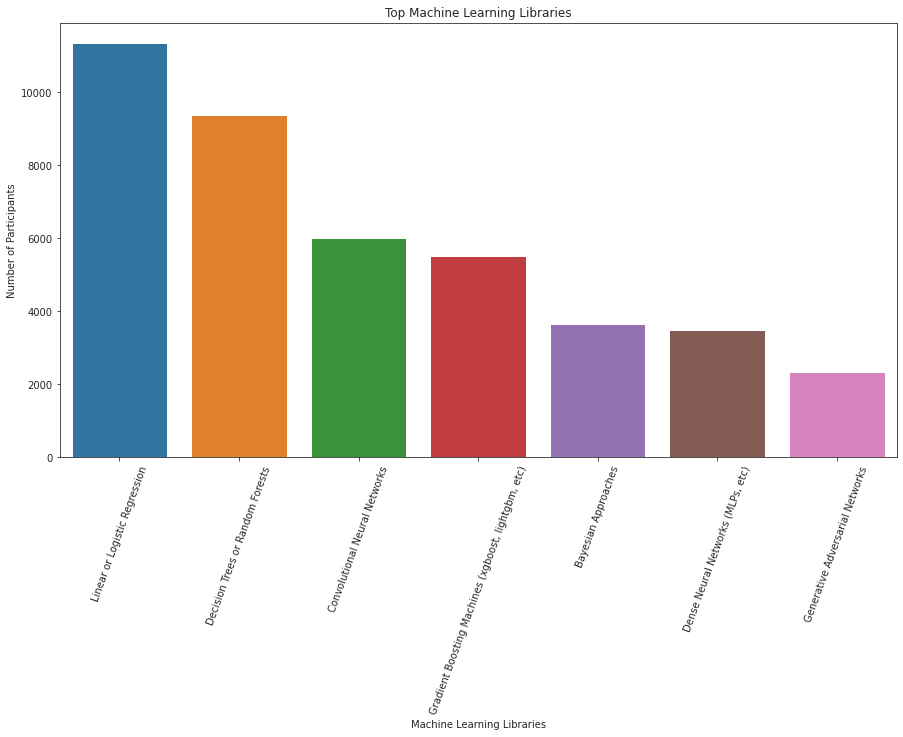

In [100]:
#Top Mchine Learning Algorithms
fig, ax = plt.subplots(figsize=(15,8))
sns.set_style("ticks")
# ax.set_ylim([0,20])
ax.set_ylabel("Number of Participants")
ax.set_title("Top Machine Learning Libraries")
ax.set_xlabel("Machine Learning Libraries")
plt.xticks(rotation=70)
sns.barplot( y = ml_algorithms, x = ml_algorithms.index, orient='v')
plt.show();

# Do you use any of the following business intelligence tools?
- Amazon QuickSight
- Microsoft Power BI
- Google Data Studio
- Tableau

In [101]:
aqs = df['Q36_1'].value_counts()[:-1]
pbi = df['Q36_2'].value_counts()[:-1]
gds = df['Q36_3'].value_counts()[:-1]
tb = df['Q36_5'].value_counts()[:-1]


In [102]:
business_ai_tools = pd.DataFrame([tb, gds, aqs, pbi]).sum().sort_values(ascending = False)
business_ai_tools

Tableau               1732.0
Microsoft Power BI    1658.0
Google Data Studio     643.0
Amazon QuickSight      224.0
dtype: float64

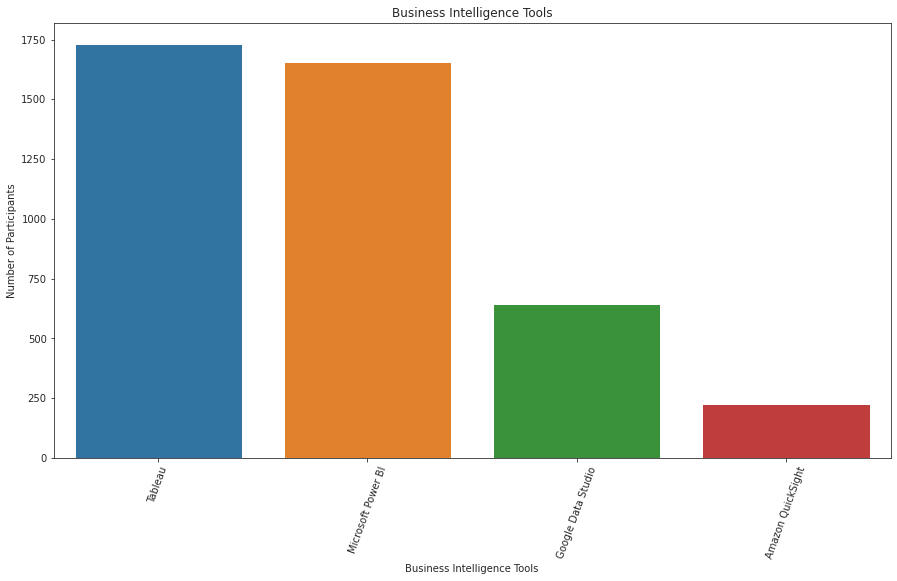

In [103]:
#Salary range
fig, ax = plt.subplots(figsize=(15,8))
sns.set_style("ticks")
# ax.set_ylim([0,20])
ax.set_ylabel("Number of Participants")
ax.set_title("Business Intelligence Tools")
ax.set_xlabel("Business Intelligence Tools")
plt.xticks(rotation=70)
sns.barplot( y = business_ai_tools, x = business_ai_tools.index, orient='v')
plt.show();

### Tablue and Power BI is leading the business intellegent platform and visualization.


# Which of the following cloud computing platforms do you use? (Select all that apply)
- AWS
- Azure
- GCP

Compare these three famous plateforms

In [104]:
aws = df['Q31_1'].value_counts()[:-1]
azure = df['Q31_2'].value_counts()[:-1]
gcp = df['Q31_3'].value_counts()[:-1]
com_platforms = pd.DataFrame([aws, azure, gcp]).sum().sort_values(ascending = False)


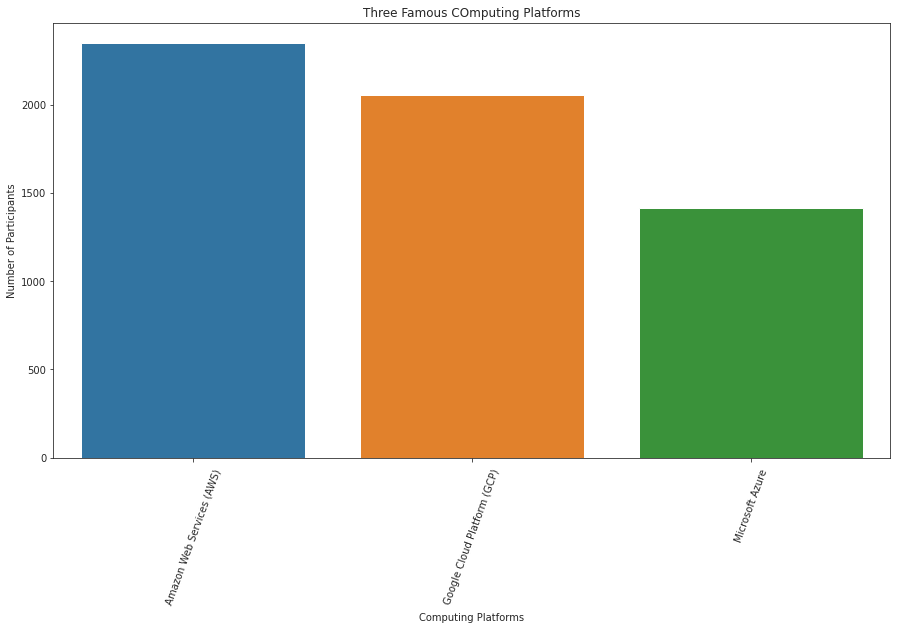

In [105]:
#Salary range
fig, ax = plt.subplots(figsize=(15,8))
sns.set_style("ticks")
# ax.set_ylim([0,20])
ax.set_ylabel("Number of Participants")
ax.set_title("Three Famous COmputing Platforms")
ax.set_xlabel("Computing Platforms")
plt.xticks(rotation=70)
sns.barplot( y = com_platforms, x = com_platforms.index, orient='v')
plt.show();

# Select the title most similar to your current role (or most recent title if retired):

In [118]:
role = df["Q23"].value_counts()[:-1]
role

Data Scientist                                                      1929
Data Analyst (Business, Marketing, Financial, Quantitative, etc)    1538
Currently not employed                                              1432
Software Engineer                                                    980
Teacher / professor                                                  833
Manager (Program, Project, Operations, Executive-level, etc)         832
Other                                                                754
Research Scientist                                                   593
Machine Learning/ MLops Engineer                                     571
Engineer (non-software)                                              465
Data Engineer                                                        352
Statistician                                                         125
Data Architect                                                        95
Data Administrator                                 

In [119]:
titles = pd.DataFrame([role])
titles

,Data Scientist,"Data Analyst (Business, Marketing, Financial, Quantitative, etc)",Currently not employed,Software Engineer,Teacher / professor,"Manager (Program, Project, Operations, Executive-level, etc)",Other,Research Scientist,Machine Learning/ MLops Engineer,Engineer (non-software),Data Engineer,Statistician,Data Architect,Data Administrator,Developer Advocate
Q23,1929,1538,1432,980,833,832,754,593,571,465,352,125,95,70,61


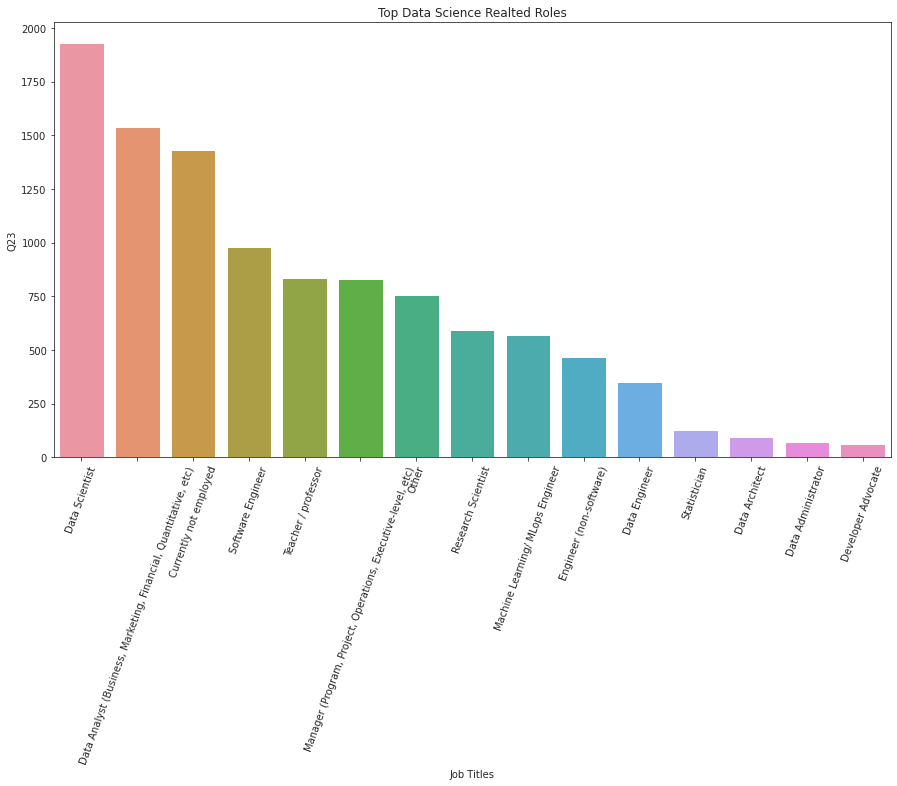

In [124]:
#Top Mchine Learning Algorithms
fig, ax = plt.subplots(figsize=(15,8))
sns.set_style("ticks")
# ax.set_ylim([0,20])
ax.set_ylabel("Count of Titles")
ax.set_title("Top Data Science Realted Roles")
ax.set_xlabel("Job Titles")
plt.xticks(rotation=70)
sns.barplot( y = role, x = role.index, orient='v')
plt.show();

# What is your current yearly compensation (approximate $USD)?

In [122]:
yearly_salary = df['Q29'].value_counts()[:-1]
yearly_salary

$0-999              1112
10,000-14,999        493
30,000-39,999        464
1,000-1,999          444
40,000-49,999        421
100,000-124,999      404
5,000-7,499          391
50,000-59,999        366
7,500-9,999          362
150,000-199,999      342
20,000-24,999        337
60,000-69,999        318
15,000-19,999        299
70,000-79,999        289
25,000-29,999        277
2,000-2,999          271
125,000-149,999      269
3,000-3,999          244
4,000-4,999          234
80,000-89,999        222
90,000-99,999        197
200,000-249,999      155
250,000-299,999       78
300,000-499,999       76
$500,000-999,999      48
>$1,000,000           23
Name: Q29, dtype: int64

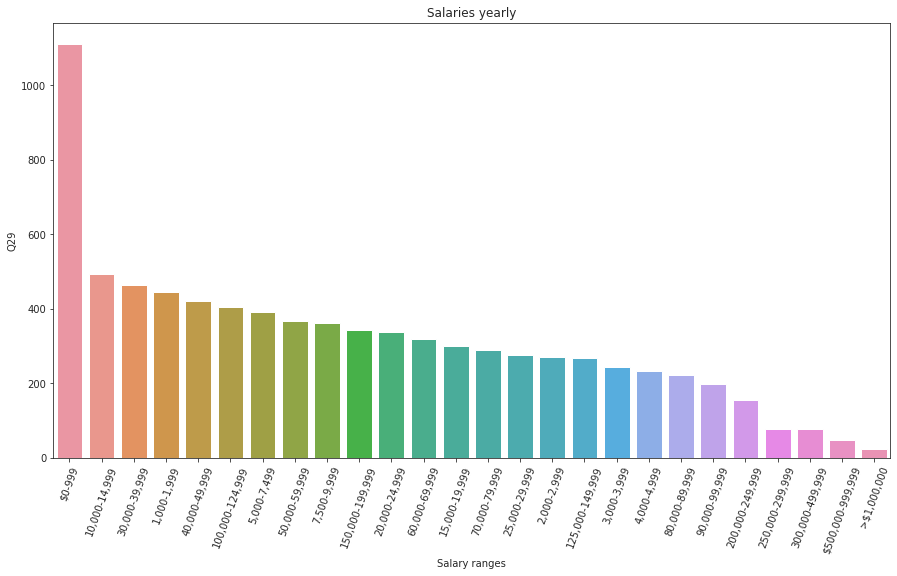

In [123]:
#Salary range
fig, ax = plt.subplots(figsize=(15,8))
sns.set_style("ticks")
# ax.set_ylim([0,20])
ax.set_ylabel("Number of Participants")
ax.set_title("Salaries yearly")
ax.set_xlabel("Salary ranges")
plt.xticks(rotation=70)
sns.barplot( y = yearly_salary, x = yearly_salary.index, orient='v')
plt.show();

In [26]:
ques = list(df.columns)[6:18]

In [27]:
ques

['Q6_2',
 'Q6_3',
 'Q6_4',
 'Q6_5',
 'Q6_6',
 'Q6_7',
 'Q6_8',
 'Q6_9',
 'Q6_10',
 'Q6_11',
 'Q6_12',
 'Q7_1']

In [34]:
def comb_question():
    for n in df.columns:
      

Q6
Q6
Q6
Q6
Q6
Q7


In [32]:
x

'Q7_1'

In [58]:
cnt = []
for n in df.columns:
    if n[1:2] == '6':
        cnt.append(df[n].value_counts()[:1])
    else:
        break
print (pd.DataFrame(cnt).sum())

Series([], dtype: float64)


In [54]:
len(df.columns)

296